<a href="https://colab.research.google.com/github/copdsd/ALZ/blob/main/GIT5Aug_bbb_IND_alzheimer_resultsComputed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, LeaveOneOut, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier, Perceptron
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
# from catboost import CatBoostClassifier
import numpy as np

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_csv('/content/alz-balance-FV.csv', sep=',',header=None)

# Define a function to replace specific text values in the DataFrame
def replace_text_in_dataframe(dataframe, text='#NAME?', replacement=0):
    return dataframe.applymap(lambda x: replacement if str(x) == text else x)

# Replace specific text values in the dataset
dataset = replace_text_in_dataframe(dataset)

# Replace NaN values with 0 in the entire dataset
dataset = dataset.fillna(0)

# Replace infinity values with a large finite number
numeric_cols = dataset.select_dtypes(include=[np.number])

for column in numeric_cols.columns:
    dataset[column].replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaNs introduced by the replacement of infinities
dataset = dataset.fillna(0)

# Check the first few rows of the dataset to confirm changes
print(dataset.head())

# Ensure that all data is of numeric type (float32)
dataset = dataset.astype('float32')

# Separate features (X) and target variable (y)
X = dataset.iloc[:, :-1].values  # Assuming the last column is the target variable
y = dataset.iloc[:, -1].values


<ipython-input-5-f49efc123d92>:5: DtypeWarning: Columns (57,60,62,63,103,109) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/alz-balance-FV.csv', sep=',',header=None)
<ipython-input-5-f49efc123d92>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return dataframe.applymap(lambda x: replacement if str(x) == text else x)


     0        1          2             3        4          5             6    \
0   8857   357892   19175068  1.155648e+09   358140   14436987  7.729948e+08   
1   2318    47766    1291882  3.929923e+07    47078     973938  2.640892e+07   
2  57004  5764737  775196721  1.170000e+11  5743994  579405577  7.780258e+10   
3   1947    39521    1072121  3.283969e+07    37944     765453  2.078980e+07   
4   6452   223893   10348103  5.381722e+08   222027    7680657  3.548677e+08   

         7             8             9    ...     513      514      515  \
0   19217404  7.716718e+08  1.157209e+09  ...    9028    32676    59205   
1    1236792  2.563788e+07  3.674105e+07  ...    1115      904     1899   
2  766477410  7.715775e+10  1.150000e+11  ...  356148  1087205  1959192   
3    1002006  2.007115e+07  2.999161e+07  ...       0      912     4342   
4   10165539  3.508799e+08  5.224735e+08  ...     365    16252    27072   

       516      517      518      519      520  521  522  
0    3086

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:134: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:134: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

std_scale = MinMaxScaler()
X = np.nan_to_num(X.astype('float32'))
X_scaled = std_scale.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:490: RuntimeWarning: overflow encountered in subtract
  data_range = data_max - data_min
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
dataset

0           1             2             3           4    \
0       8857.0    357892.0  1.917507e+07  1.155648e+09    358140.0   
1       2318.0     47766.0  1.291882e+06  3.929922e+07     47078.0   
2      57004.0   5764737.0  7.751967e+08  1.170000e+11   5743994.0   
3       1947.0     39521.0  1.072121e+06  3.283969e+07     37944.0   
4       6452.0    223893.0  1.034810e+07  5.381722e+08    222027.0   
...        ...         ...           ...           ...         ...   
6516   18261.0    965701.0  6.747298e+07  5.301705e+09    948288.0   
6517   40427.0   3301787.0  3.576580e+08  4.356452e+10   3293125.0   
6518  102396.0  13672684.0  2.430653e+09  4.860000e+11  13627350.0   
6519   34150.0   2577322.0  2.575982e+08  2.893764e+10   2525176.0   
6520  143050.0  21625742.0  4.356126e+09  9.870000e+11  21481304.0   

               5             6             7             8             9    \
0     1.443699e+07  7.729948e+08  1.921740e+07  7.716718e+08  1.157209e+09   
1     9.739380e+05  2.640892e+07  1.236792e+06  2.563788e+07  3.674105e+07   
2     5.794056e+08  7.780259e+10  7.664774e+08  7.715774e+10  1.150000e+11   
3     7.654530e+05  2.078980e+07  1.002006e+06  2.007115e+07  2.999161e+07   
4     7.680657e+06  3.548677e+08  1.016554e+07  3.508799e+08  5.224735e+08   
...            ...           ...           ...           ...           ...   
6516  5.010500e+07  3.498985e+09  6.580253e+07  3.470077e+09  5.142886e+09   
6517  2.693506e+08  2.917422e+10  3.532417e+08  2.889914e+10  4.253522e+10   
6518  1.818362e+09  3.230000e+11  2.411096e+09  3.220000e+11  4.790000e+11   
6519  1.902651e+08  1.898625e+10  2.478863e+08  1.863605e+10  2.734475e+10   
6520  3.242011e+09  6.520000e+11  4.297111e+09  6.480000e+11  9.690000e+11   

      ...        513        514        515        516         517         518  \
0     ...     9028.0    32676.0    59205.0    30863.0     63989.0    139934.0   
1     ...     1115.0      904.0     1899.0     2361.0      3185.0      4681.0   
2     ...   356148.0  1087205.0  1959192.0  1583305.0   2473878.0   4293532.0   
3     ...        0.0      912.0     4342.0     1247.0      2626.0      2384.0   
4     ...      365.0    16252.0    27072.0    14462.0     39852.0     63681.0   
...   ...        ...        ...        ...        ...         ...         ...   
6516  ...    54233.0   178325.0    67221.0   240200.0     74331.0     84309.0   
6517  ...   219637.0   995978.0   508624.0   927688.0    555027.0    451634.0   
6518  ...   863509.0  5382996.0  5324303.0  4912149.0   6362122.0  10798852.0   
6519  ...   111140.0   673405.0   453128.0   349369.0    335932.0    437007.0   
6520  ...  3524755.0  8662654.0  8177445.0  7221690.0  10859380.0  16530786.0   

            519        520  521  522  
0       73331.0    38068.0  0.0  0.0  
1        2115.0     4232.0  0.0  0.0  
2     2526107.0  1786936.0  0.0  0.0  
3        3573.0     4025.0  0.0  0.0  
4       31614.0    23187.0  0.0  0.0  
...         ...        ...  ...  ...  
6516    12350.0   104913.0  0.0  1.0  
6517   178318.0   377742.0  0.0  1.0  
6518  5991263.0  5296897.0  0.0  1.0  
6519   218521.0   429408.0  0.0  1.0  
6520  6062375.0  9276417.0  0.0  1.0  

[6521 rows x 523 columns]

In [ ]:
seed = np.random.seed(5)
inputSize=522

self Consistency

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
print('Self-Consistency Random Forest')
clf = clf1.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(y))]
lr_probs=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(y, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(y, lr_probs)
auc_score = round(roc_auc_score(y, lr_probs),2)

print('Self-Consistency LGBM')
clf=clf2.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs2=[0 for _ in range(len(y))]
lr_probs2=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs2=lr_probs2[:, 1]

# calculate roc curves
ns_fpr2, ns_tpr2, _=roc_curve(y, ns_probs2)
lr_fpr2, lr_tpr2, _=roc_curve(y, lr_probs2)
auc_score2 = round(roc_auc_score(y, lr_probs2),2)

print('Self-Consistency XGB')
clf=clf3.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(y))]
lr_probs3=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(y, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(y, lr_probs3)
auc_score3 = round(roc_auc_score(y, lr_probs3),2)


print('Self-Consistency ET')
clf=clf4.fit(X,y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs4=[0 for _ in range(len(y))]
lr_probs4=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs4=lr_probs4[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _=roc_curve(y, ns_probs4)
lr_fpr4, lr_tpr4, _=roc_curve(y, lr_probs4)
auc_score4 = round(roc_auc_score(y, lr_probs4),2)

print('Self-Consistency Stacking')
clf=clf5.fit(X, y)
pred=np.round(clf.predict(X))
tn, fp, fn, tp = confusion_matrix(y, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(y, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs5=[0 for _ in range(len(y))]
lr_probs5=clf.predict_proba(X)
# keep probabilities for the positive outcome only
lr_probs5=lr_probs5[:, 1]

# calculate roc curves
ns_fpr5, ns_tpr5, _=roc_curve(y, ns_probs5)
lr_fpr5, lr_tpr5, _=roc_curve(y, lr_probs5)
auc_score5 = round(roc_auc_score(y, lr_probs5),2)





Self-Consistency Random Forest
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score: 100.0
Self-Consistency LGBM
[LightGBM] [Info] Number of positive: 3067, number of negative: 3454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122530
[LightGBM] [Info] Number of data points in the train set: 6521, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470327 -> initscore=-0.118833
[LightGBM] [Info] Start training from score -0.118833
Accuracy: 97.01
Sensitivity/Recall: 97.45
Specificity: 96.51
MCC: 0.93998
Precision: 96.92
F1_Score: 97.18
Self-Consistency XGB
Accuracy: 99.97
Sensitivity/Recall: 100.0
Specificity: 99.93
MCC: 0.99938
Precision: 99.94
F1_Score: 99.97
Self-Consistency ET
Accuracy: 100.0
Sensitivity/Recall: 100.0
Specificity: 100.0
MCC: 1.0
Precision: 100.0
F1_Score

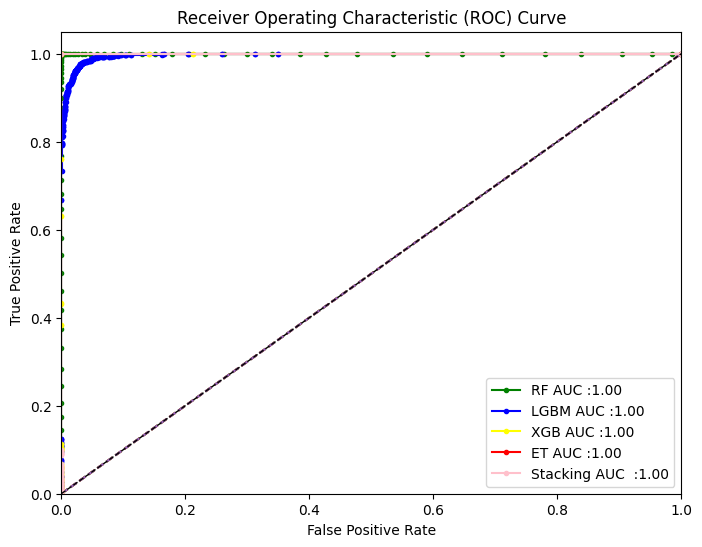

In [ ]:
import matplotlib as mpl

from matplotlib import pyplot

#pyplot.figure(figsize=(20, 10), dpi=600)
pyplot.figure(figsize=(8, 6))
# plot the roc curve for the model
pyplot.title("Self Consistency Graph")
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC :{:.2f}'.format(auc_score))

pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', color='blue', label='LGBM AUC :{:.2f}'.format(auc_score2))

pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='yellow', label='XGB AUC :{:.2f}'.format(auc_score3))

pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='red', label='ET AUC :{:.2f}'.format(auc_score4))



pyplot.plot(ns_fpr5, ns_tpr5, linestyle='--')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', color='pink', label='Stacking AUC  :{:.2f}'.format(auc_score5))

# axis labels
#pyplot.xlabel('False Positive Rate')
#pyplot.ylabel('True Positive Rate')
# show the legend
#pyplot.legend(loc="lower right", fontsize=20, ncol=1)
# show the plot
#pyplot.show()


pyplot.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver Operating Characteristic (ROC) Curve')
pyplot.legend(loc='lower right')
pyplot.show()



# **Independent**

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=100, max_depth=50, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf6= BaggingClassifier()

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed)
print('Independent Dataset Test Random Forest')
clf=clf1.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs=[0 for _ in range(len(Y_test))]
lr_probs=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs=lr_probs[:, 1]

# calculate roc curves
ns_fpr1, ns_tpr1, _=roc_curve(Y_test, ns_probs)
lr_fpr1, lr_tpr1, _=roc_curve(Y_test, lr_probs)
auc_score = round(roc_auc_score(Y_test, lr_probs),2)

print('Independent Dataset Test LG')
clf=clf2.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs2=[0 for _ in range(len(Y_test))]
lr_probs2=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs2=lr_probs2[:, 1]

# calculate roc curves
ns_fpr2, ns_tpr2, _=roc_curve(Y_test, ns_probs2)
lr_fpr2, lr_tpr2, _=roc_curve(Y_test, lr_probs2)
auc_score2 = round(roc_auc_score(Y_test, lr_probs2),2)

print('Independent Dataset Test XGB')
clf=clf3.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs3=[0 for _ in range(len(Y_test))]
lr_probs3=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs3=lr_probs3[:, 1]

# calculate roc curves
ns_fpr3, ns_tpr3, _=roc_curve(Y_test, ns_probs3)
lr_fpr3, lr_tpr3, _=roc_curve(Y_test, lr_probs3)
auc_score3 = round(roc_auc_score(Y_test, lr_probs3),2)

print('Independent Dataset Test Extra Tree')
clf=clf4.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs4=[0 for _ in range(len(Y_test))]
lr_probs4=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs4=lr_probs4[:, 1]

# calculate roc curves
ns_fpr4, ns_tpr4, _=roc_curve(Y_test, ns_probs4)
lr_fpr4, lr_tpr4, _=roc_curve(Y_test, lr_probs4)
auc_score4 = round(roc_auc_score(Y_test, lr_probs4),2)

Independent Dataset Test Random Forest
Accuracy: 94.23
Sensitivity/Recall: 95.12
Specificity: 93.25
MCC: 0.88427
Precision: 93.92
F1_Score: 94.52


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


Independent Dataset Test LG
[LightGBM] [Info] Number of positive: 2134, number of negative: 2430
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 119406
[LightGBM] [Info] Number of data points in the train set: 4564, number of used features: 484
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467572 -> initscore=-0.129893
[LightGBM] [Info] Start training from score -0.129893
Accuracy: 81.45
Sensitivity/Recall: 84.57
Specificity: 78.03
MCC: 0.62812
Precision: 80.86
F1_Score: 82.67
Independent Dataset Test XGB
Accuracy: 81.4
Sensitivity/Recall: 84.28
Specificity: 78.24
MCC: 0.62703
Precision: 80.96
F1_Score: 82.59
Independent Dataset Test Extra Tree
Accuracy: 81.96
Sensitivity/Recall: 85.94
Specificity: 77.6
MCC: 0.63877
Precision: 80.81
F1_Score: 83.3


In [ ]:
print('Independent Dataset Test stacking')
clf=clf5.fit(X_train, Y_train)
pred=np.round(clf.predict(X_test))
tn, fp, fn, tp = confusion_matrix(Y_test, pred, labels=[1, 0]).ravel()
acc = np.round(((tn + tp) / (tn + fp + fn + tp)) * 100, 2)
sp = np.round((tn / (fp + tn)) * 100, 2)
sn = np.round((tp / (tp + fn)) * 100, 2)
mcc = np.round(matthews_corrcoef(Y_test, pred), 5)
pre = np.round((tp / (tp + fp)) * 100, 2)
f1 = np.round(2 * (pre * sn) / (pre + sn), 2)
print("Accuracy: " + str(acc))
print("Sensitivity/Recall: " + str(sn))
print("Specificity: " + str(sp))
print("MCC: " + str(mcc))
print("Precision: " + str(pre))
print("F1_Score: " + str(f1))

ns_probs5=[0 for _ in range(len(Y_test))]
lr_probs5=clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs5=lr_probs5[:, 1]

# calculate roc curves
ns_fpr5, ns_tpr5, _=roc_curve(Y_test, ns_probs5)
lr_fpr5, lr_tpr5, _=roc_curve(Y_test, lr_probs5)
auc_score5 = round(roc_auc_score(Y_test, lr_probs5),2)

Independent Dataset Test stacking
Accuracy: 81.86
Sensitivity/Recall: 84.28
Specificity: 79.21
MCC: 0.63621
Precision: 81.65
F1_Score: 82.94


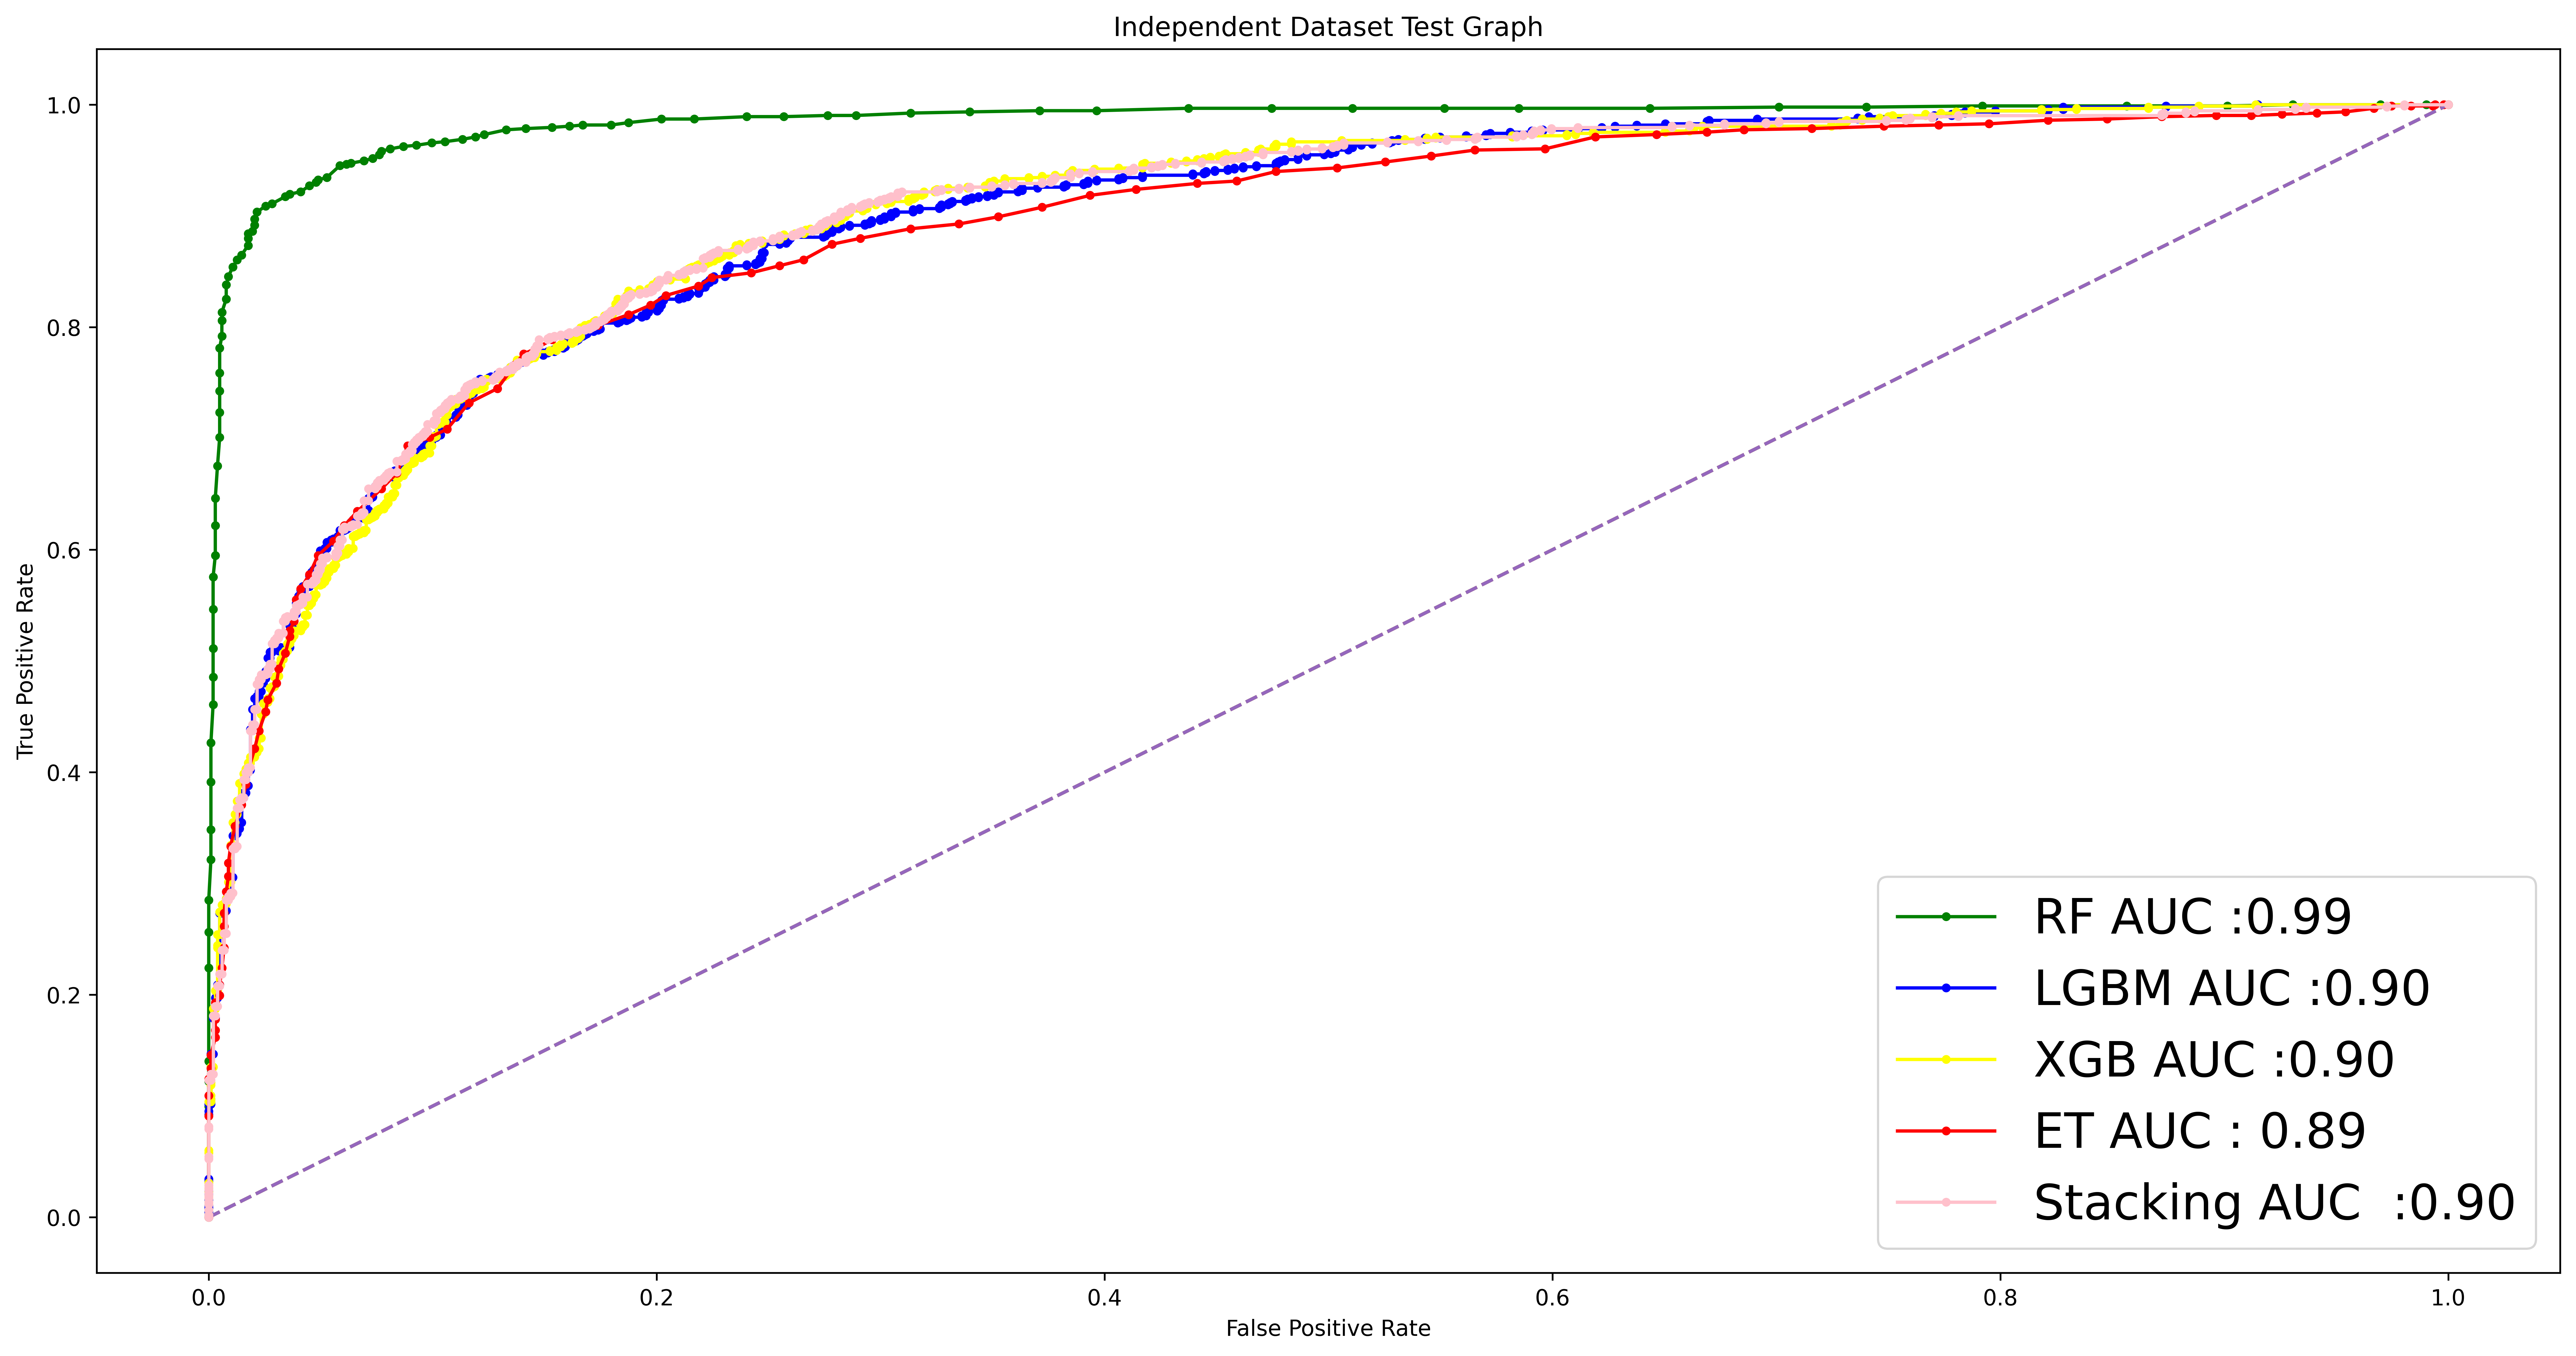

In [ ]:
# replace X1 with X_test and Y1 with y_test
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

#pyplot.rcParams['figure.dpi'] = 200

pyplot.figure(figsize=(20, 10), dpi=600)

# plot the roc curve for the model
#plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label=f'RF AUC : {auc_score:.3f}')
#plt.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC : {:.3f}'.format(auc_score))

pyplot.title("Independent Dataset Test Graph")
pyplot.plot(ns_fpr1, ns_tpr1, linestyle='--')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', color='green', label='RF AUC :{:.2f}'.format(auc_score))

pyplot.plot(ns_fpr2, ns_tpr2, linestyle='--')
pyplot.plot(lr_fpr2, lr_tpr2, marker='.', color='blue', label='LGBM AUC :{:.2f}'.format(auc_score2))

pyplot.plot(ns_fpr3, ns_tpr3, linestyle='--')
pyplot.plot(lr_fpr3, lr_tpr3, marker='.', color='yellow', label='XGB AUC :{:.2f}'.format(auc_score3))

pyplot.plot(ns_fpr4, ns_tpr4, linestyle='--')
pyplot.plot(lr_fpr4, lr_tpr4, marker='.', color='red', label='ET AUC : '+str(auc_score4))

pyplot.plot(ns_fpr5, ns_tpr5, linestyle='--')
pyplot.plot(lr_fpr5, lr_tpr5, marker='.', color='pink', label='Stacking AUC  :{:.2f}'.format(auc_score5))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc="lower right", fontsize=22, ncol=1)
# show the plot
pyplot.show()

# **10-Fold**

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
clf2=LGBMClassifier()
clf1=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4=ExtraTreesClassifier()
clf6 = BaggingClassifier(random_state=42)

In [ ]:
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
cv=10

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encount

[LightGBM] [Info] Number of positive: 2782, number of negative: 3086
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.076788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122130
[LightGBM] [Info] Number of data points in the train set: 5868, number of used features: 516
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474097 -> initscore=-0.103706
[LightGBM] [Info] Start training from score -0.103706
[LightGBM] [Info] Number of positive: 2768, number of negative: 3101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.104151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 121948
[LightGBM] [Info] Number of data points in the train set: 5869, number of used features: 513
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471631 -> initscore=-0.113600
[LightGBM] [Info] Start training from score -0.113600
[LightGBM] [

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid v

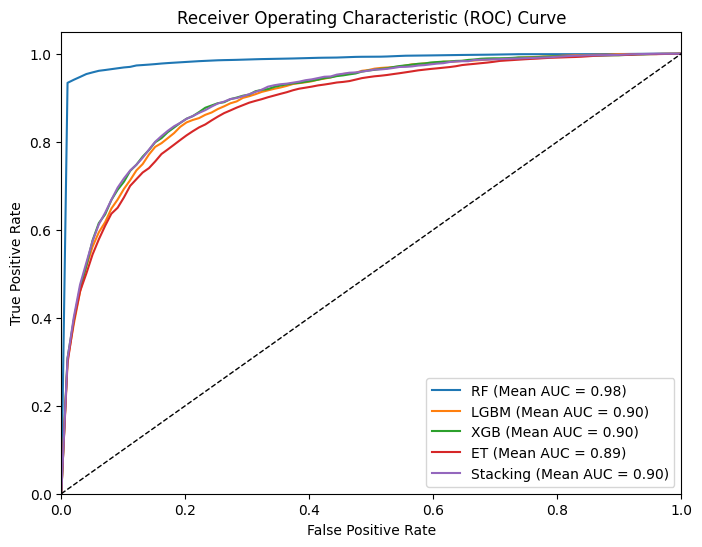

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined with your data

# Initialize classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
clf2 = LGBMClassifier(random_state=42)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1, random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)


# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = {'RF': clf1, 'LGBM': clf2, 'XGB': clf3, 'ET': clf4, 'Stacking': clf5}

plt.figure(figsize=(8, 6))

# Perform 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[0] = 0.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{clf_name} (Mean AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np

# Define your classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf2 = LGBMClassifier()
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4 = ExtraTreesClassifier()
lr = LogisticRegression(random_state=42)
clf5 = StackingClassifier(estimators=[('xgb', clf3), ('rf', clf1)], final_estimator=lr)

classifiers = {
    'Random Forest': clf1,
    'LGBM': clf2,
    'XGBoost': clf3,
    'Extra Trees': clf4,
    'Stacking': clf5
}

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kfold = StratifiedKFold(n_splits=10, shuffle=True)

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[1, 0]).ravel()
    acc = ((tn + tp) / (tn + fp + fn + tp)) * 100
    sp = (tn / (fp + tn)) * 100
    sn = (tp / (tp + fn)) * 100
    mcc = matthews_corrcoef(y_true, y_pred)
    pre = (tp / (tp + fp)) * 100
    f1 = 2 * (pre * sn) / (pre + sn)
    return acc, sp, sn, mcc, pre, f1

# Store average metrics for each classifier
average_metrics = {name: [] for name in classifiers.keys()}

# Perform cross-validation and compute metrics for each classifier
for name, clf in classifiers.items():
    metrics = {'acc': [], 'sp': [], 'sn': [], 'mcc': [], 'pre': [], 'f1': []}
    print(f'10-fold Cross-Validation {name}')
    for train_index, test_index in kfold.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        Y_train_fold, Y_test_fold = y[train_index], y[test_index]
        clf.fit(X_train_fold, Y_train_fold)
        pred = np.round(clf.predict(X_test_fold))
        acc, sp, sn, mcc, pre, f1 = compute_metrics(Y_test_fold, pred)
        metrics['acc'].append(acc)
        metrics['sp'].append(sp)
        metrics['sn'].append(sn)
        metrics['mcc'].append(mcc)
        metrics['pre'].append(pre)
        metrics['f1'].append(f1)

    # Compute average metrics for the current classifier
    average_metrics[name] = {metric: np.mean(values) for metric, values in metrics.items()}
    print(f'Average metrics for {name}:')
    print(f"Accuracy: {average_metrics[name]['acc']:.2f}")
    print(f"Sensitivity/Recall: {average_metrics[name]['sn']:.2f}")
    print(f"Specificity: {average_metrics[name]['sp']:.2f}")
    print(f"MCC: {average_metrics[name]['mcc']:.5f}")
    print(f"Precision: {average_metrics[name]['pre']:.2f}")
    print(f"F1 Score: {average_metrics[name]['f1']:.2f}")
    print()

# Summary of average metrics for all classifiers
print("Summary of average metrics for all classifiers:")
for name, metrics in average_metrics.items():
    print(f"{name}:")
    print(f"Accuracy: {metrics['acc']:.2f}")
    print(f"Sensitivity/Recall: {metrics['sn']:.2f}")
    print(f"Specificity: {metrics['sp']:.2f}")
    print(f"MCC: {metrics['mcc']:.5f}")
    print(f"Precision: {metrics['pre']:.2f}")
    print(f"F1 Score: {metrics['f1']:.2f}")
    print()


10-fold Cross-Validation Random Forest
Average metrics for Random Forest:
Accuracy: 98.25
Sensitivity/Recall: 98.64
Specificity: 97.82
MCC: 0.96495
Precision: 98.17
F1 Score: 98.40

10-fold Cross-Validation LGBM
[LightGBM] [Info] Number of positive: 2760, number of negative: 3108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122115
[LightGBM] [Info] Number of data points in the train set: 5868, number of used features: 515
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470348 -> initscore=-0.118749
[LightGBM] [Info] Start training from score -0.118749
[LightGBM] [Info] Number of positive: 2761, number of negative: 3108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122115
[LightGBM] [Info] Number of

# **5FOLD**

[LightGBM] [Info] Number of positive: 2483, number of negative: 2733
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 121804
[LightGBM] [Info] Number of data points in the train set: 5216, number of used features: 513
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476035 -> initscore=-0.095932
[LightGBM] [Info] Start training from score -0.095932
[LightGBM] [Info] Number of positive: 2461, number of negative: 2756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 121399
[LightGBM] [Info] Number of data points in the train set: 5217, number of used features: 511
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471727 -> initscore=-0.113213
[LightGBM] [Info] Start training from score -0.113213
[LightGBM] [

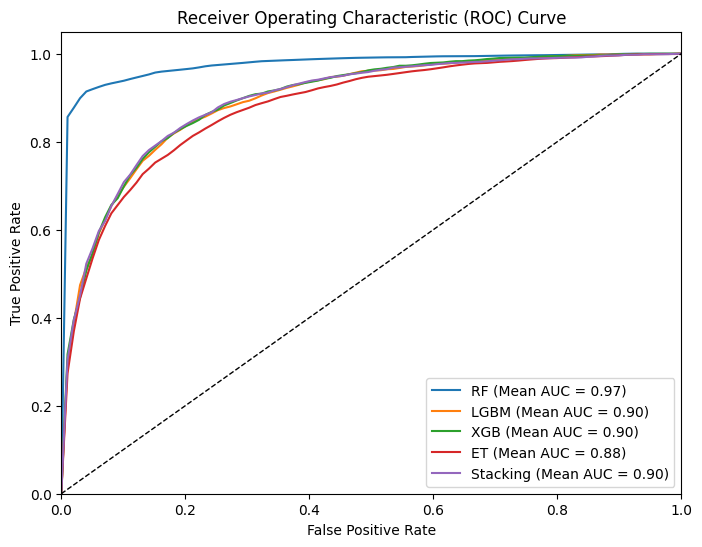

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are already defined with your data

# Initialize classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True, random_state=42)
clf2 = LGBMClassifier(random_state=42)
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1, random_state=42)
clf4 = ExtraTreesClassifier(random_state=42)


# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner
clf5 = StackingClassifier(
    estimators=[('xgb', clf3),('rf', clf1) ],final_estimator=lr)

classifiers = {'RF': clf1, 'LGBM': clf2, 'XGB': clf3, 'ET': clf4, 'Stacking': clf5}

plt.figure(figsize=(8, 6))

# Perform 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[0] = 0.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{clf_name} (Mean AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np

# Define your classifiers
clf1 = RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
clf2 = LGBMClassifier()
clf3 = XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
clf4 = ExtraTreesClassifier()
lr = LogisticRegression(random_state=42)
clf5 = StackingClassifier(estimators=[('xgb', clf3), ('rf', clf1)], final_estimator=lr)

classifiers = {
    'Random Forest': clf1,
    'LGBM': clf2,
    'XGBoost': clf3,
    'Extra Trees': clf4,
    'Stacking': clf5
}

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[1, 0]).ravel()
    acc = ((tn + tp) / (tn + fp + fn + tp)) * 100
    sp = (tn / (fp + tn)) * 100
    sn = (tp / (tp + fn)) * 100
    mcc = matthews_corrcoef(y_true, y_pred)
    pre = (tp / (tp + fp)) * 100
    f1 = 2 * (pre * sn) / (pre + sn)
    return acc, sp, sn, mcc, pre, f1

# Store average metrics for each classifier
average_metrics = {name: [] for name in classifiers.keys()}

# Perform cross-validation and compute metrics for each classifier
for name, clf in classifiers.items():
    metrics = {'acc': [], 'sp': [], 'sn': [], 'mcc': [], 'pre': [], 'f1': []}
    print(f'10-fold Cross-Validation {name}')
    for train_index, test_index in kfold.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        Y_train_fold, Y_test_fold = y[train_index], y[test_index]
        clf.fit(X_train_fold, Y_train_fold)
        pred = np.round(clf.predict(X_test_fold))
        acc, sp, sn, mcc, pre, f1 = compute_metrics(Y_test_fold, pred)
        metrics['acc'].append(acc)
        metrics['sp'].append(sp)
        metrics['sn'].append(sn)
        metrics['mcc'].append(mcc)
        metrics['pre'].append(pre)
        metrics['f1'].append(f1)

    # Compute average metrics for the current classifier
    average_metrics[name] = {metric: np.mean(values) for metric, values in metrics.items()}
    print(f'Average metrics for {name}:')
    print(f"Accuracy: {average_metrics[name]['acc']:.2f}")
    print(f"Sensitivity/Recall: {average_metrics[name]['sn']:.2f}")
    print(f"Specificity: {average_metrics[name]['sp']:.2f}")
    print(f"MCC: {average_metrics[name]['mcc']:.5f}")
    print(f"Precision: {average_metrics[name]['pre']:.2f}")
    print(f"F1 Score: {average_metrics[name]['f1']:.2f}")
    print()

# Summary of average metrics for all classifiers
print("Summary of average metrics for all classifiers:")
for name, metrics in average_metrics.items():
    print(f"{name}:")
    print(f"Accuracy: {metrics['acc']:.2f}")
    print(f"Sensitivity/Recall: {metrics['sn']:.2f}")
    print(f"Specificity: {metrics['sp']:.2f}")
    print(f"MCC: {metrics['mcc']:.5f}")
    print(f"Precision: {metrics['pre']:.2f}")
    print(f"F1 Score: {metrics['f1']:.2f}")
    print()

10-fold Cross-Validation Random Forest
Average metrics for Random Forest:
Accuracy: 96.25
Sensitivity/Recall: 97.28
Specificity: 95.08
MCC: 0.92474
Precision: 95.96
F1 Score: 96.59

10-fold Cross-Validation LGBM
[LightGBM] [Info] Number of positive: 2453, number of negative: 2763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 121450
[LightGBM] [Info] Number of data points in the train set: 5216, number of used features: 510
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470284 -> initscore=-0.119005
[LightGBM] [Info] Start training from score -0.119005
[LightGBM] [Info] Number of positive: 2454, number of negative: 2763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 121371
[LightGBM] [Info] Number of

# **tsne Graph**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X_scaled)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9986758232116699


In [ ]:
pca_result_50

array([[-2.53884101e+00,  1.11911035e+00, -3.43626827e-01, ...,
        -4.99144662e-03, -8.18366837e-03,  6.11345517e-04],
       [-2.61713386e+00,  1.83590353e+00, -5.93977928e-01, ...,
        -5.59668476e-03,  4.03632969e-03,  3.05131631e-04],
       [ 2.86847448e+00, -1.81578052e+00, -1.35208499e+00, ...,
        -1.26979835e-02, -1.11908074e-02,  1.42839197e-02],
       ...,
       [ 7.99298906e+00,  7.67791271e-01, -2.60290001e-02, ...,
         6.76565766e-02,  5.84333912e-02,  2.00028922e-02],
       [-2.31750995e-01, -1.75745964e+00,  5.16591489e-01, ...,
        -1.31758573e-02, -3.18016037e-02,  7.68084032e-03],
       [ 1.29393425e+01,  4.10864782e+00,  2.05904603e+00, ...,
        -9.47954804e-02,  1.66416019e-02,  4.25568633e-02]], dtype=float32)

In [ ]:
import time

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 27.6259708404541 seconds


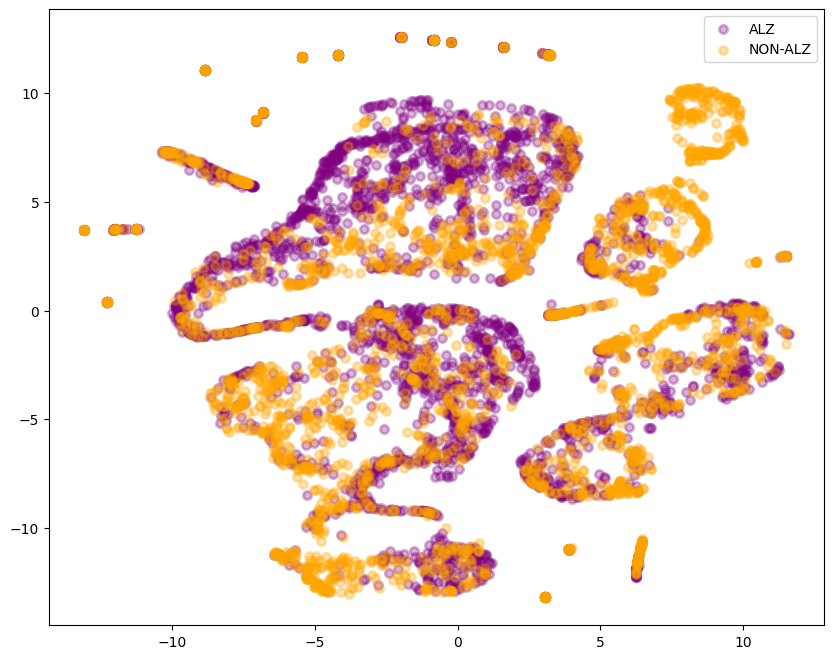

In [ ]:
# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange' ]
label = ['ALZ','NON-ALZ' ]
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

Cumulative explained variation for 50 principal components: 0.9975122213363647
t-SNE done! Time elapsed: 37.64131140708923 seconds


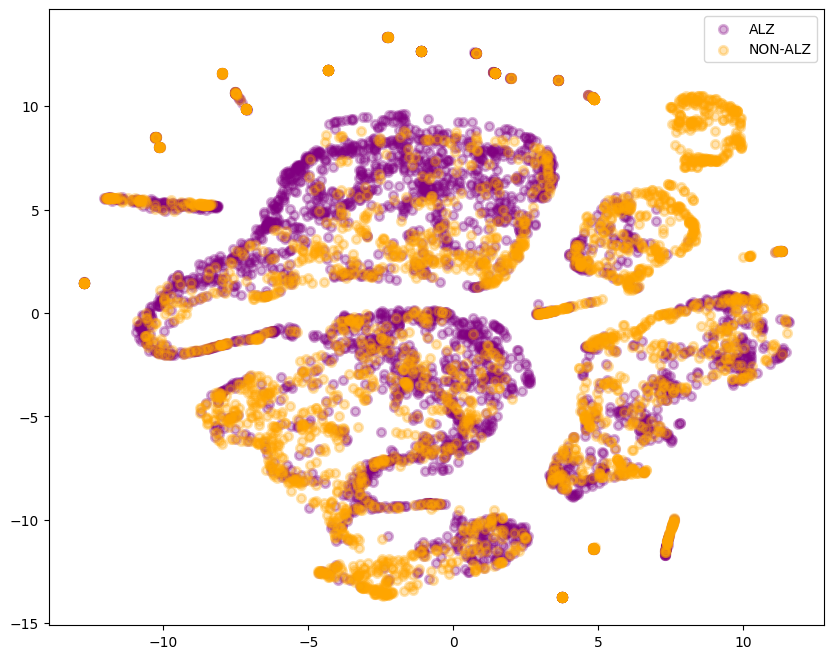

In [ ]:
pca_50 = PCA(n_components=30)
pca_result_50 = pca_50.fit_transform(X_scaled)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange' ]
label = ['ALZ','NON-ALZ' ]
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

Cumulative explained variation for 50 principal components: 0.9997224807739258
t-SNE done! Time elapsed: 43.28530192375183 seconds


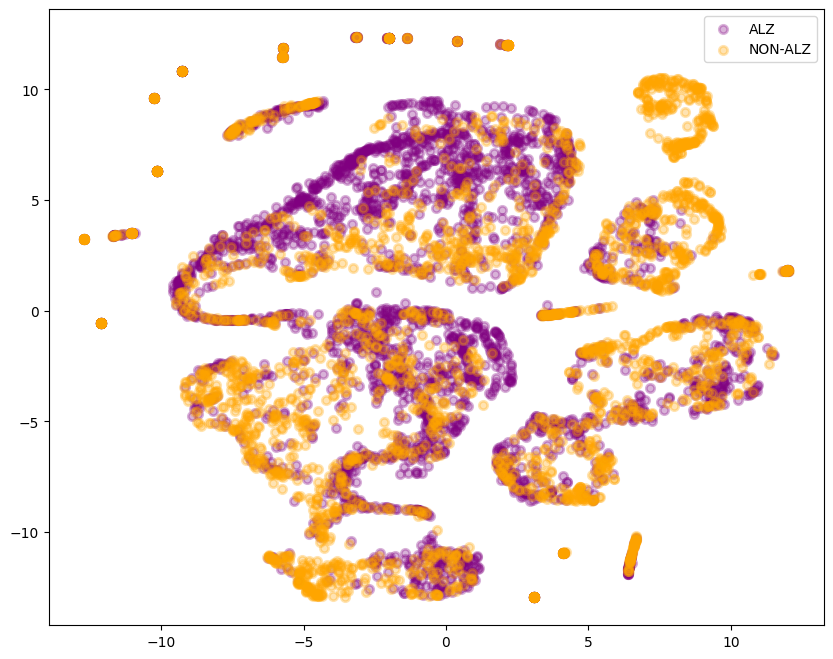

In [ ]:
pca_50 = PCA(n_components=100)
pca_result_50 = pca_50.fit_transform(X_scaled)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange' ]
label = ['ALZ','NON-ALZ' ]
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

Cumulative explained variation for 50 principal components: 0.9509089589118958
t-SNE done! Time elapsed: 21.40620470046997 seconds


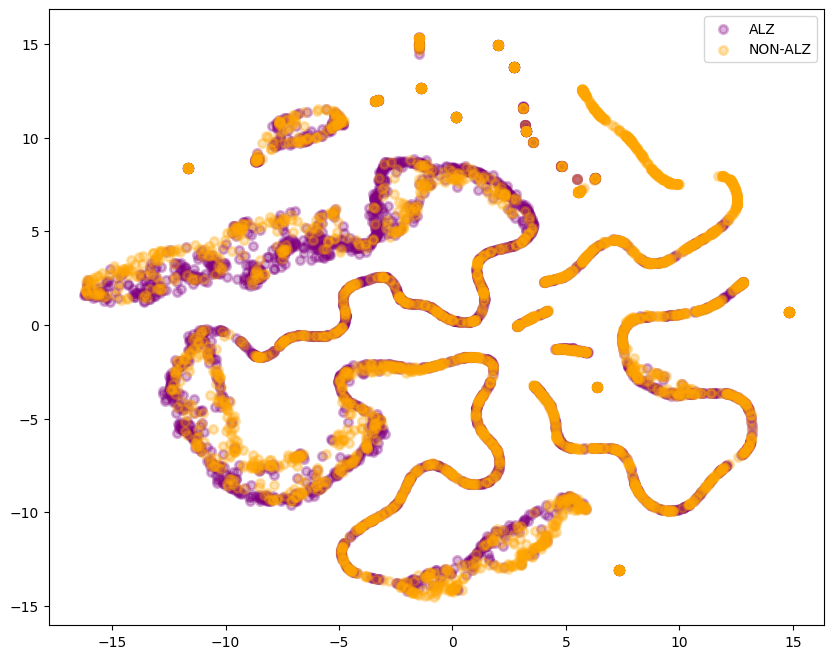

In [ ]:
pca_50 = PCA(n_components=5)
pca_result_50 = pca_50.fit_transform(X_scaled)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
# visualise again and highlight actual classes of data

target_ids = range(len(y))

plt.figure(figsize=(10, 8))
colours = ['purple','orange' ]
label = ['ALZ','NON-ALZ' ]
for i, c, label in zip(target_ids, colours, label):
    plt.scatter(tsne_pca_results[y == i, 0], tsne_pca_results[y == i, 1], c=c, label=label, alpha=0.3, linewidths = 2 )
    pass

plt.legend()
plt.show()

# **Boundry**

[LightGBM] [Info] Number of positive: 29, number of negative: 31
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483333 -> initscore=-0.066691
[LightGBM] [Info] Start training from score -0.066691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

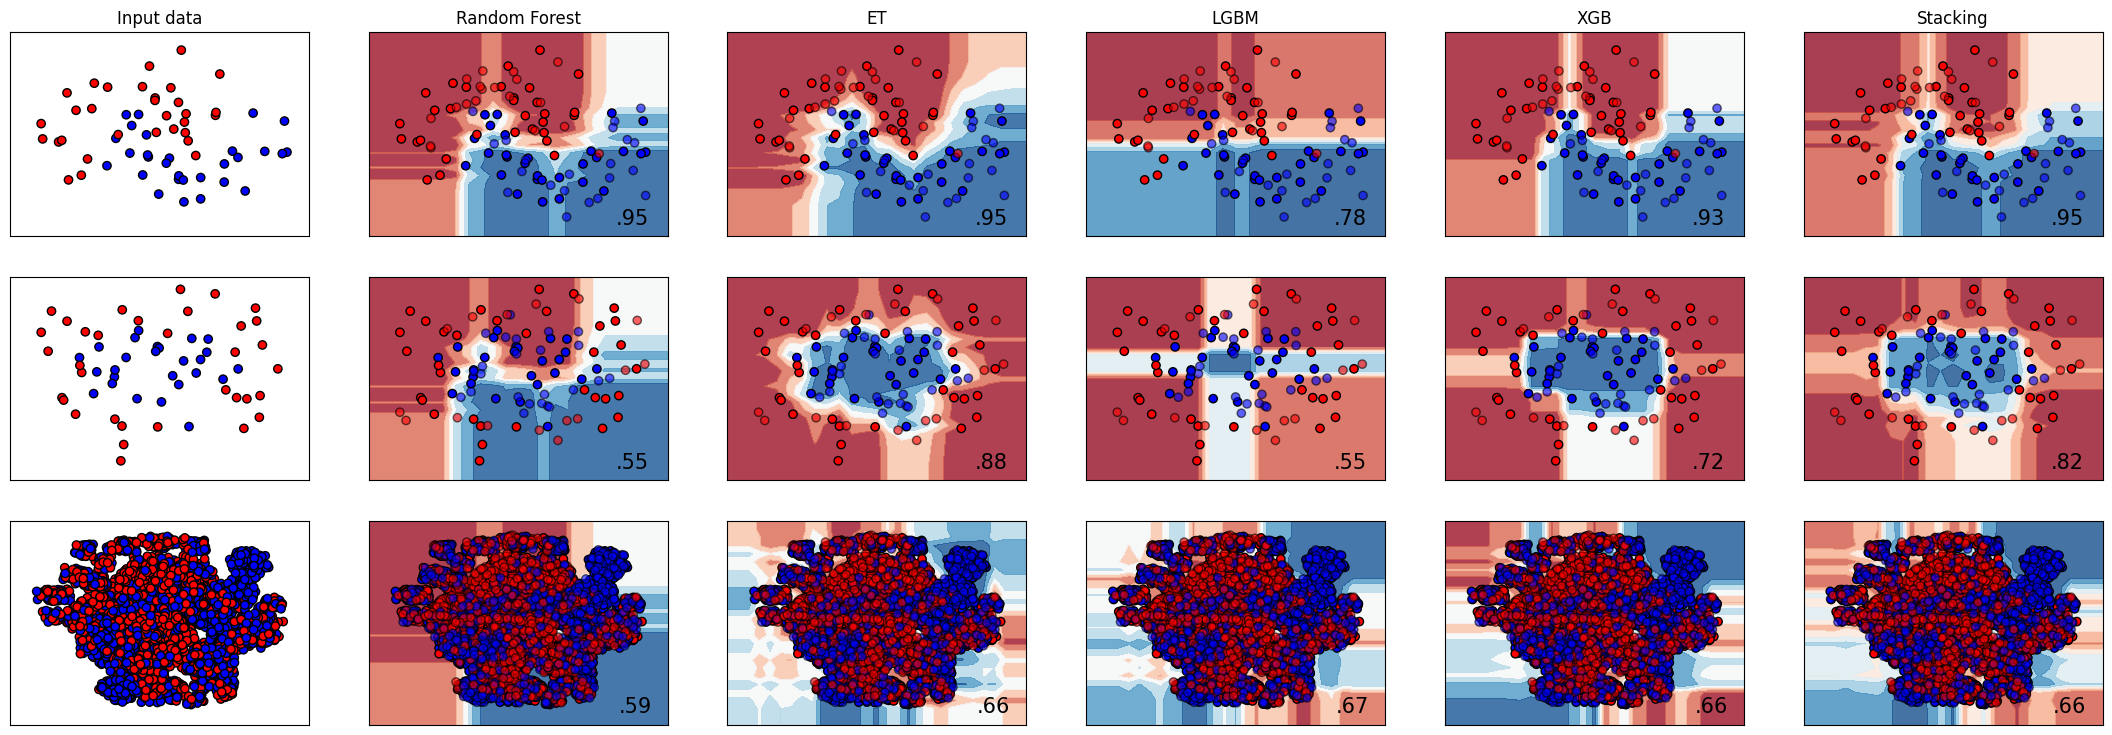

<Figure size 12000x12000 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier

h=0.2
xgbst=XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1)
etst=ExtraTreesClassifier()
rfst=RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True)
bg=BaggingClassifier()
lg=LGBMClassifier()
lsvc=LinearSVC()

# Define your meta-learner
lr = LogisticRegression(random_state=42)

# Define your stacking classifier with the base learners and meta-learner

st = StackingClassifier(
    estimators=[('xgb', xgbst),('rf', rfst) ],final_estimator=lr)


names = [
    "Random Forest",
    "ET",
    "LGBM",
    "XGB",

    "Stacking",
]
from sklearn.linear_model import LogisticRegression

classifiers = [
    RandomForestClassifier(n_estimators=50, max_depth=25, oob_score=True, n_jobs=-1, warm_start=True),
    ExtraTreesClassifier(),
    LGBMClassifier(),
    XGBClassifier(n_estimators=100, max_depth=9, learning_rate=0.1) ,

    st
]

X, y =  tsne_pca_results,y
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
# Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )

         # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
plt.figure(figsize=(20, 20), dpi=600)

plt.tight_layout()
plt.show()